In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from keras.models import Sequential
from keras.layers import Dense

In [2]:
data=pd.read_csv('forestfires.csv')

In [3]:
df=data.dropna()
df

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


In [4]:
dummies=pd.get_dummies(df.size_category)
dummies.head(2)

,large,small
0,0,1
1,0,1


In [5]:
df=pd.concat([df,dummies],axis='columns')
df.head(2)

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category,large,small
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,1,0,0,0,0,small,0,1
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,1,0,small,0,1


In [6]:
df.drop('month',axis='columns',inplace=True)
df.drop('day',axis='columns',inplace=True)
df.drop('small',axis='columns',inplace=True)

In [7]:
df.drop('size_category',axis='columns',inplace=True)
df

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,large
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,...,0,0,0,0,1,0,0,0,0,0
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,...,0,0,0,0,0,0,0,1,0,0
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,...,0,0,0,0,0,0,0,1,0,0
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1,...,0,0,0,0,1,0,0,0,0,0
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,...,0,0,0,0,0,0,0,0,0,1
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,...,0,0,0,0,0,0,0,0,0,1
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,...,0,0,0,0,0,0,0,0,0,1
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,...,0,0,0,0,0,0,0,0,0,0


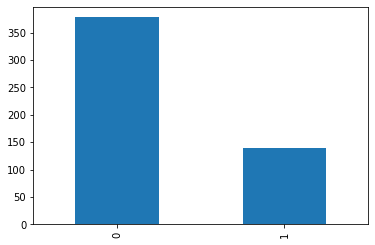

In [8]:
import seaborn as sns
df['large'].value_counts().plot(kind='bar')

In [18]:
prdc=df.iloc[:,0:28]
resp=df.iloc[:,28]

In [20]:
x_train,x_test,y_train,y_test=train_test_split(prdc,resp,test_size=0.2)
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(413, 28) (413,)
(104, 28) (104,)


In [22]:
kerasmodel=Sequential()
kerasmodel.add(Dense(12,input_dim=28,activation='relu'))
kerasmodel.add(Dense(8,activation='relu'))
kerasmodel.add(Dense(1,activation='sigmoid'))


In [23]:
#COMPILING MODEL
kerasmodel.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [24]:
#FITTING MODEL
kerasmodel.fit(x_train,y_train,epochs=150,batch_size=10)

Epoch 1/150
42/42 [==============================] - 6s 9ms/step - loss: 22.0953 - accuracy: 0.4540
Epoch 2/150
42/42 [==============================] - 0s 8ms/step - loss: 3.7073 - accuracy: 0.6691: 0s - loss: 3.6954 - accuracy
Epoch 3/150
42/42 [==============================] - 0s 7ms/step - loss: 2.6194 - accuracy: 0.7044
Epoch 4/150
42/42 [==============================] - 0s 7ms/step - loss: 1.4778 - accuracy: 0.7265
Epoch 5/150
42/42 [==============================] - 0s 7ms/step - loss: 0.8879 - accuracy: 0.7734
Epoch 6/150
42/42 [==============================] - 0s 8ms/step - loss: 0.7201 - accuracy: 0.8018
Epoch 7/150
42/42 [==============================] - 0s 6ms/step - loss: 0.7633 - accuracy: 0.7750: 0s - loss: 0.8473 - accuracy: 
Epoch 8/150
42/42 [==============================] - 0s 7ms/step - loss: 0.6772 - accuracy: 0.8214
Epoch 9/150
42/42 [==============================] - 0s 7ms/step - loss: 0.4949 - accuracy: 0.8580
Epoch 10/150
42/42 [==========================

In [25]:
#TRAIN ACCURACY
_,accuracy=kerasmodel.evaluate(x_train,y_train)
print('train accuracy: %.2f' % (accuracy*100))

13/13 [==============================] - 1s 7ms/step - loss: 0.0757 - accuracy: 0.9685
train accuracy: 96.85


In [27]:
#test accuracy
from sklearn.metrics import accuracy_score
y_pred=kerasmodel.predict_classes(x_test)
accuracy_score(y_test,y_pred)

C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


0.9807692307692307